## Exploring a single simulation

In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from datetime import timedelta as delta
from matplotlib.animation import FuncAnimation, writers, PillowWriter
from copy import copy
import cmocean
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

In [10]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [13]:
r_pl_clist = ['#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']
r_pl_cmap = plt.get_cmap('RdPu_r')

mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['orangered', 'lime', 'cornflowerblue', 'gold']

In [162]:
region = 'SO'
mortality = 0.39              # [d-1]
runtime = 80                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'markov_0_KPP_reflect_tidal'
rho_p = 920
sizebinedges = [1e-3, 0.5e-3, 1e-4, 1e-5, 1e-6]
res = '1x1'

In [163]:
# ds = xr.open_dataset(datadir+'regional_GPGP_bfadv_Jan_2004_3D_grid2x2_allrho_allr_20days_60dtsecs_12hrsoutdt.nc')
# ds = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+res+'res_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [164]:
times = ds['time'][0,:].astype('O')
timelabels = ds['time'][0,:].dt.strftime('%Y-%m-%d')

In [165]:
number_of_trajectories_to_plot = 125
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 125 of 10000 trajectories
plotting every 80 particles


In [166]:
lons = copy(ds['lon'][:].values)
lats = copy(ds['lat'][:].values)
depths = copy(ds['z'][:].values)
sizes = copy(ds['r_pl'][:].values)
sizecolors = (np.log10(sizes)-np.log10(sizes.min()))*256/(np.log10(sizes.max())-np.log10(sizes.min()))

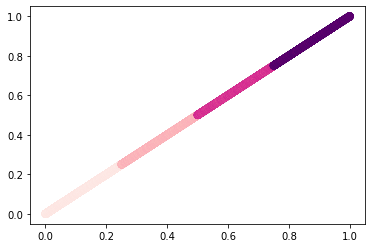

In [167]:
c= r_pl_cmap(sizecolors.astype(int))
plt.scatter(np.linspace(0,1,len(c)),np.linspace(0,1,len(c)),s=50,color=c)

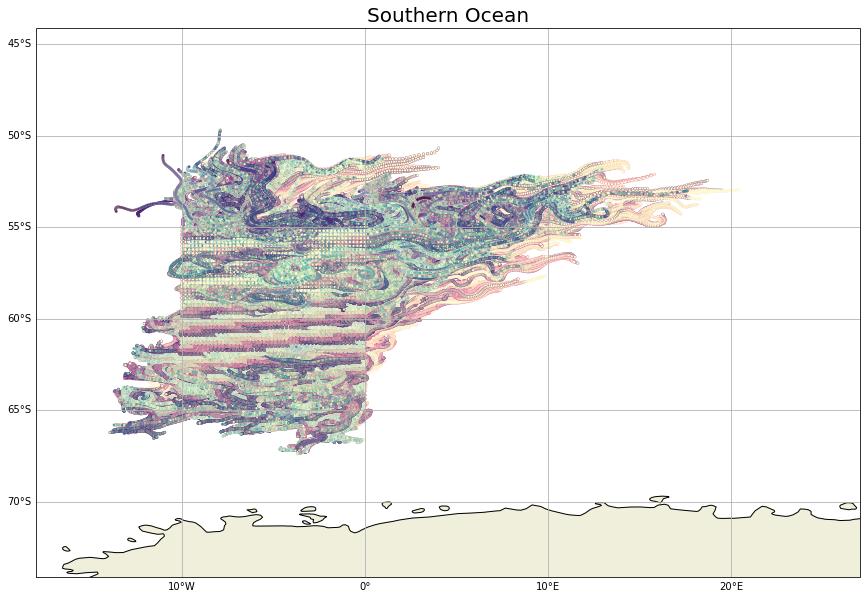

In [168]:
fig = plt.figure(figsize=(16,8), constrained_layout=True)
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_title(regions[region], fontsize=20)
c= r_pl_cmap(sizecolors.astype(int))
ax.scatter(lons,lats,c=depths,cmap='cmo.deep',s=7, edgecolors=c,linewidth=0.2, transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# ax.set_extent([165,240,-15,15], crs=ccrs.PlateCarree())
ax.set_ylim(np.mean(ds['lat'])-15,np.mean(ds['lat'])+15)
# ax.set_xlim(np.mean(ds['lon'].where(ds['lon']<0))-45+180,np.mean(ds['lon'].where(ds['lon']<0))+26+180)
ax.set_xlim(np.mean(ds['lon'])-15,np.mean(ds['lon'])+30)
plt.show()

In [157]:
outputdt = delta(hours=12)
timerange = np.arange(np.nanmin(ds['time'].values),
                      np.nanmax(ds['time'].values)+np.timedelta64(outputdt), 
                      outputdt)  # timerange in nanoseconds
timedays = np.zeros(len(timerange), dtype='<U10')
for i in range(len(timerange)):
    timedays[i] = str(timerange[i])[:10]
timedays = np.unique(timedays)

In [23]:
time_id = np.where(np.logical_and(ds['time'] >= timerange[0],ds['time'] < timerange[1])) # All trajectory data for a single day


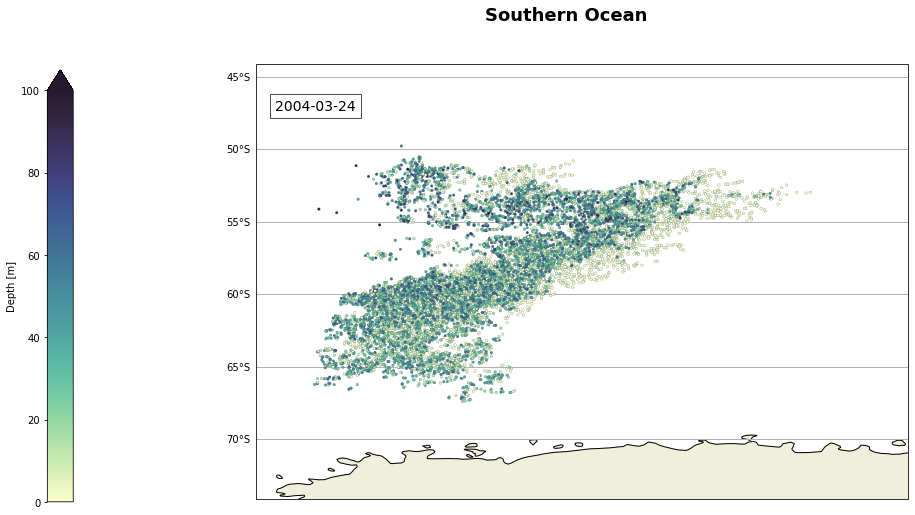

In [24]:
fig = plt.figure(figsize=(18,8))
fig.suptitle(regions[region], fontsize=18, fontweight='bold')
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_ylim(np.mean(ds['lat'])-15,np.mean(ds['lat'])+15)
# ax.set_xlim(np.mean(ds['lon'].where(ds['lon']<0))-45+180,np.mean(ds['lon'].where(ds['lon']<0))+26+180)
ax.set_xlim(np.mean(ds['lon'])-15,np.mean(ds['lon'])+30)
# ax.set_yticks([-50, -40, -30, -20], crs=ccrs.PlateCarree())
# ax.set_yticklabels(['50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S', '20$^{\circ}$S'])
# ax.set_ylabel('Latitude', fontsize=11, fontweight='bold')

# ax.set_xticks([-50, -40, -30, -20, -10, 0, 10, 20], crs=ccrs.PlateCarree())
# ax.set_xticklabels(['50$^{\circ}$W', '40$^{\circ}$W', '30$^{\circ}$W', '20$^{\circ}$W', '10$^{\circ}$W', '0$^{\circ}$E', '10$^{\circ}$E', '20$^{\circ}$E'])
# ax.set_xlabel('Longitude', fontsize=11, fontweight='bold')

# depth = ax.pcolormesh(lon_bath_corners, lat_bath_corners, Depth, cmap=b_cmap,vmax =5000,zorder=2)
# ax.pcolormesh(lon_corners, lat_corners, speed, cmap=f_cmap,zorder=1)

# ax.pcolor(lon_corners, lat_corners, Coast,cmap=c_cmap,hatch='//',edgecolor='coral',zorder=3)
# coastcells = mpatches.Patch(facecolor='w',hatch='//',edgecolor='coral', label='Coastal cells')

ax.coastlines()
ax.add_feature(cfeature.LAND)

ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), xlocs=[120,140,160,180,200,220,240])
gl =ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), xlocs=[120,140,160,180,-160,-140,-120])
gl.top_labels = False
gl.right_labels = False
# gl.xlocator = mticker.FixedLocator([180, -])
# gl.ylocator = LatitudeLocator()
# gl.xformatter = LongitudeFormatter()
# gl.yformatter = LatitudeFormatter()


time_id = np.where(np.logical_and(ds['time'] >= timerange[0],ds['time'] < timerange[1])) # All trajectory data for a single day

edgecolors= r_pl_cmap(sizecolors.astype(int))
# initial = ax.scatter(ds['lon'][:,0],ds['lat'][:,0],c='w',edgecolor='orangered',s=100,zorder=3)
scatter = ax.scatter(lons[time_id].T,lats[time_id].T,c=depths[time_id].T,cmap='cmo.deep',s=7, edgecolors=edgecolors,linewidth=0.2,vmin=0,vmax=100, transform=ccrs.PlateCarree(),zorder=4)

# time_id_TDC = np.where(np.logical_and(TDCdata['time'] >= timerange[0],TDCdata['time'] < timerange[24])) # All trajectory data for a single day

# site_TDC = ax.scatter(lons_TDC[1,0],lats_TDC[1,0],c='w',edgecolor='seagreen',s=100,zorder=3)
# scatter_TDC = ax.scatter(lons_TDC[time_id_TDC].T,lats_TDC[time_id_TDC].T,c=launch_TDC[time_id_TDC],cmap=p_cmap,vmin=-0.5,vmax=0.5,alpha=0.4,edgecolor='seagreen',zorder=4)

# N_site = ax.scatter(lonsN[0,0].T,latsN[0,0].T,c='w',edgecolor='r',s=40,zorder=3)

time_text = ax.text(0.03, 0.92,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=14, bbox={'facecolor':'w', 'alpha':0.7, 'pad':5}) # Initialise time ticker

## Depth colorbar
axcb = fig.add_axes([0.1, 0.12, 0.02, 0.75])
CB = plt.colorbar(scatter, cax=axcb,label='Depth [m]',extend='max')
axcb.yaxis.set_ticks_position('left')
axcb.yaxis.set_label_position('left')

def animate(i):
#     time_id_TDC = np.where(np.logical_and(TDCdata['time'] >= timerange[i*24],TDCdata['time'] < timerange[(i+1)*24]))
#     scatter_TDC.set_offsets(np.c_[lons_TDC[time_id_TDC], lats_TDC[time_id_TDC]])
#     scatter_TDC.set_array(launch_TDC.T[time_id_TDC])
    
    time_id = np.where(np.logical_and(ds['time'] >= timerange[i],ds['time'] < timerange[i+1]))
    scatter.set_offsets(np.c_[lons[time_id].T, lats[time_id].T])
    scatter.set_array(depths[time_id].T)
    
    if i%2==0:
        time_text.set_text(timedays[int(i/2)])  # Update the time
    return scatter, time_text,

# custom_lines = [Line2D([0], [0], c = 'w', marker='o', markerfacecolor='sandybrown', markeredgecolor='orangered', markersize=10),
#                 Line2D([0], [0], c = 'w', marker='o', markerfacecolor='khaki', markeredgecolor='seagreen', markersize=10),
#                 Line2D([0], [0], c = 'w', marker='o', markerfacecolor='w', markeredgecolor='r', markersize=10)]

# ax.legend(custom_lines, ['Falkland Islands','Tristan Da Cunha','Kelp Blue sites'],framealpha=1,loc='lower right')

anim = FuncAnimation(fig, animate, frames = len(timerange)-1, interval=200, blit=True)

writergif = PillowWriter(fps=10, codec="libx264") 
anim.save('test4.gif', writer=writergif)

plt.show()

In [71]:
time_id = np.where(np.logical_and(ds['time'] >= timerange[2],ds['time'] < timerange[2+1]))

In [72]:
np.c_[lons[time_id].T, lats[time_id].T].shape

(10000, 2)

In [73]:
time_id

(array([   0,    1,    2, ..., 9997, 9998, 9999]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [74]:
depths[time_id].T.shape

(10000,)

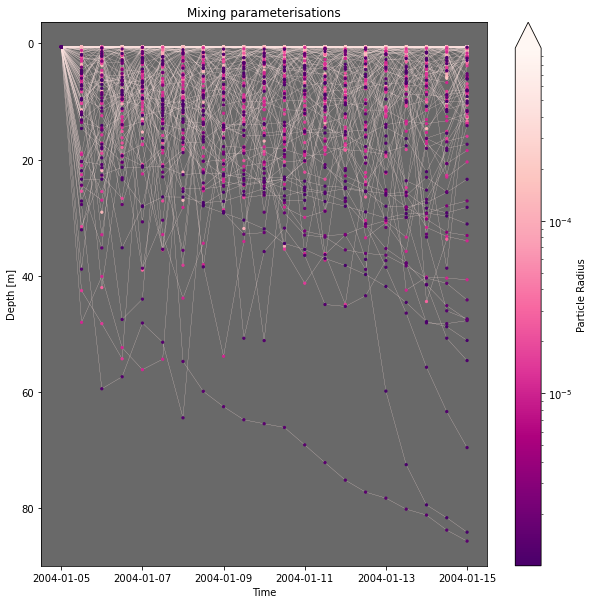

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

sc = ax.scatter(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], s=5, c=np.tile(ds['r_pl'].T[::f_plt],[len(ds['obs']),1]),cmap=r_pl_cmap,norm=mcolors.LogNorm(vmin=ds['r_pl'].min(), vmax=ds['r_pl'].max()),zorder=2)
ln = ax.plot(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax.set_title('Mixing parameterisations')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time')
ax.set_facecolor('dimgray')
# ax.set_ylim(150,0)
ax.invert_yaxis()

fig.colorbar(sc, ax=ax, extend='max', label='Particle Radius')
plt.show()

In [16]:
w_bins = [-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
w_bincenters = [-2e-1, -2e-2, -2e-3, -2e-4, -2e-5, 0, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]
w_list = ['w_m', 'vs_init', 'w_adv', 'w_m_b']
w_pdf = np.zeros((len(w_list),len(w_bins)-1))
linestyles=['-','-.']


for j,w in enumerate(w_list):
    vals, bins = np.histogram(ds[w], w_bins)
    w_pdf[j,:] = vals/ds[w].size

In [17]:
w_widths = np.ones(w_pdf.shape[1])
w_centers = np.arange(w_pdf.shape[1])
w_edges = np.arange(w_pdf.shape[1]+1)-0.5
w_bin_str = [np.format_float_scientific(w,2,exp_digits=1) for w in w_bins]

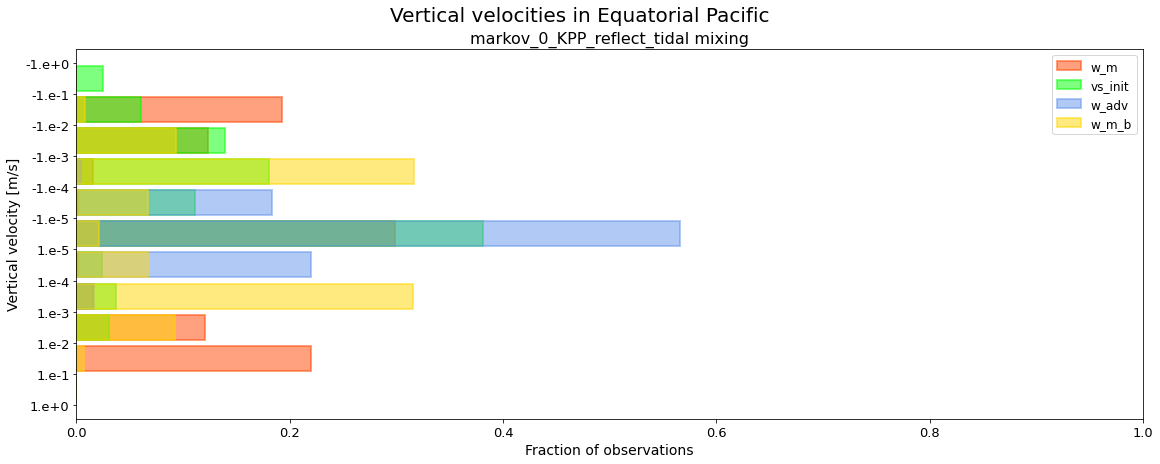

In [18]:
fig = plt.figure(figsize=(16,6),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.05)
ax=plt.axes()

for j,w in enumerate(w_list):
    ax.barh(w_centers, w_pdf[j], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w)
ax.set_xlim(0,1.)
ax.set_yticks(w_edges)
ax.set_yticklabels(w_bin_str)
ax.invert_yaxis()
ax.tick_params(axis='both', labelsize=13)
ax.set_xlabel('Fraction of observations', fontsize=14)
ax.set_ylabel('Vertical velocity [m/s]', fontsize=14)
ax.set_title(mixing+' mixing', fontsize=16)
ax.legend(fontsize=12)

In [32]:
w_pdf_sizes = np.zeros((len(w_list),len(sizebinedges)-1,len(w_bins)-1))

split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
for j,w in enumerate(w_list):
    for k,ds_r in enumerate(split_ds):
        vals, bins = np.histogram(ds_r[1][w], w_bins)
        w_pdf_sizes[j,k,:] = vals/ds_r[1][w].size

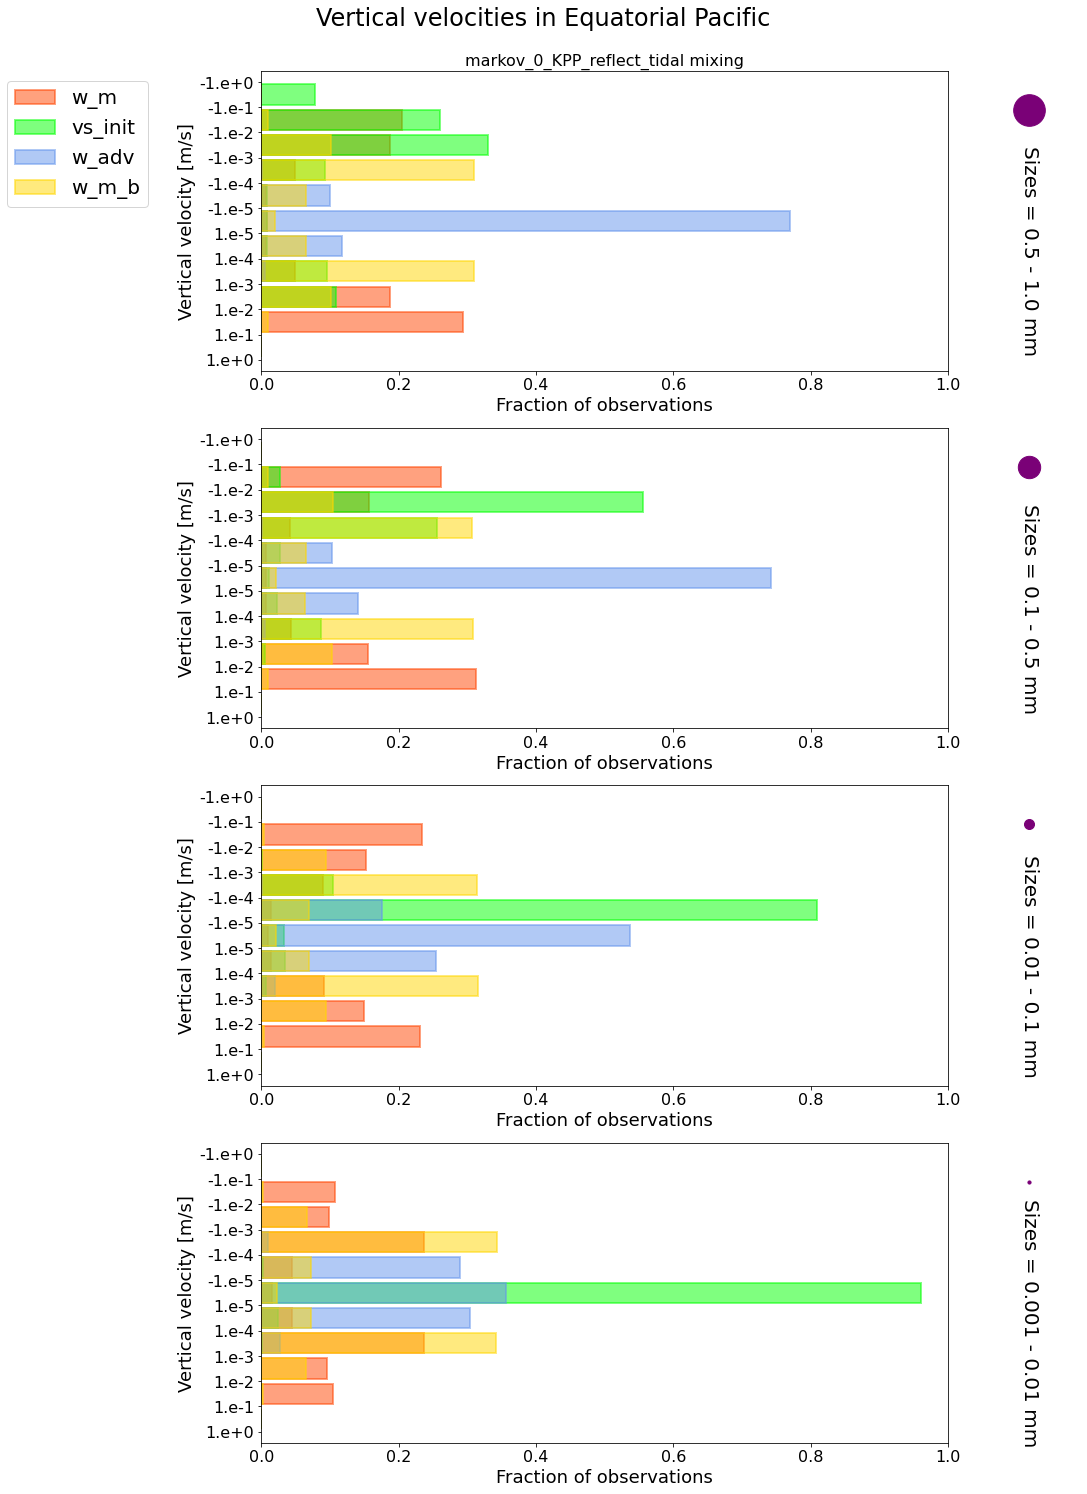

In [35]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=24, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=4, width_ratios=[1,0.15],figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[3, 1])
axes = [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]]

split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
for k, ds_r in enumerate(split_ds):
    for j,w in enumerate(w_list):
        axes[0][k].barh(w_centers, w_pdf_sizes[j,k], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w)
    axes[0][k].set_xlim(0,1.)
    axes[0][k].set_yticks(w_edges)
    axes[0][k].set_yticklabels(w_bin_str)
    axes[0][k].invert_yaxis()
    axes[0][k].tick_params(axis='both', labelsize=16)
    axes[0][k].set_xlabel('Fraction of observations', fontsize=18)
    axes[0][k].set_ylabel('Vertical velocity [m/s]', fontsize=18)
axes[0][0].set_title(mixing+' mixing', fontsize=16)

for k, ds_r in enumerate(split_ds):
    axes[1][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[-1])
    axes[1][k].set_ylim(0,1)
    axes[1][k].text(0.5,0.4,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[1][k].axis('off')
axes[0][0].legend(fontsize=20, bbox_to_anchor=(-0.15, 1))

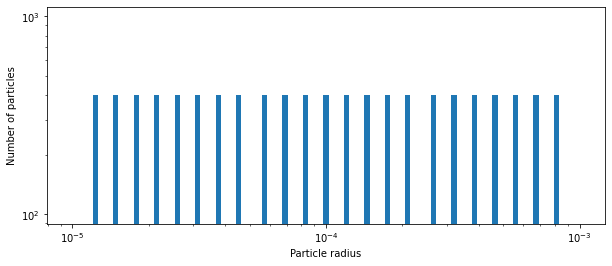

In [158]:
fig = plt.figure(figsize=(10,4)),
ax=plt.axes()
ax.hist(ds['r_pl'],np.logspace(np.log10(ds['r_pl'].min()).round(),np.log10(ds['r_pl'].max()).round(),100))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Number of particles')
ax.set_xlabel('Particle radius')
plt.show()

In [11]:
split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))

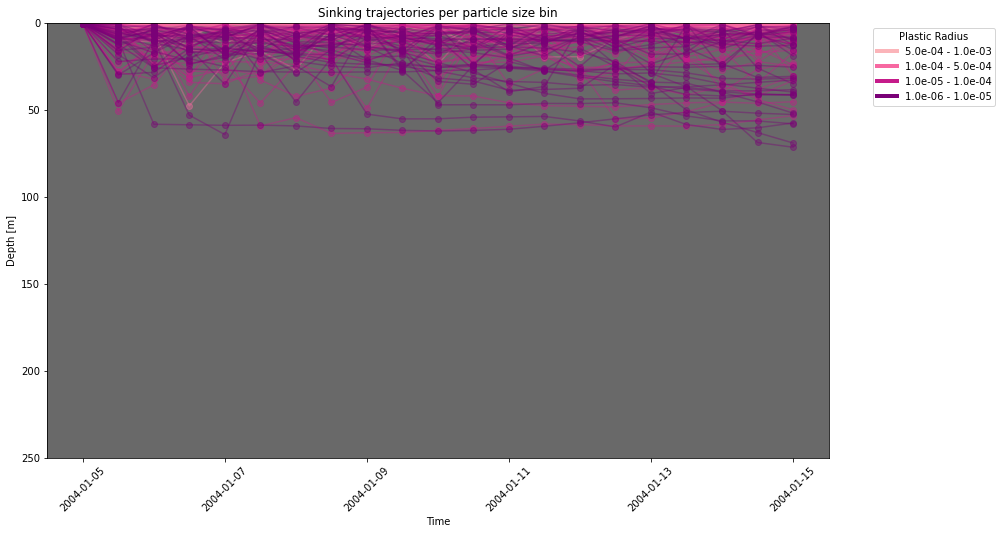

In [12]:
fig = plt.figure(figsize=(14,8))
ax=plt.axes()

for i, r in enumerate(split_ds):
    ax.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)
ax.set_facecolor('dimgray')
ax.set_ylim(250,0)
ax.set_title('Sinking trajectories per particle size bin')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time')
ax.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{:.1e} - {:.1e}".format(split_ds[1][0].left, split_ds[1][0].right), "{:.1e} - {:.1e}".format(split_ds[2][0].left, split_ds[2][0].right), "{:.1e} - {:.1e}".format(split_ds[3][0].left, split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
ds

<xarray.Dataset>
Dimensions:     (obs: 21, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float64 -4.0 -4.078 -4.155 ... 5.683 5.487 5.273
    lon         (traj, obs) float64 -140.0 -140.1 -140.2 ... -145.5 -145.3
    z           (traj, obs) float64 ...
    u           (traj, obs) float32 ...
    v           (traj, obs) float32 ...
    w           (traj, obs) float32 ...
    w_adv       (traj, obs) float32 ...
    tpp3        (traj, obs) float32 ...
    d_phy       (traj, obs) float32 ...
    nd_phy      (traj, obs) float32 ...
    a           (traj, obs) float32 ...
    a_coll      (traj, obs) float32 ...
    a_growth    (traj, obs) float32 ...
    a_resp      (traj, obs) float32 ...
    vs          (traj, obs) float32 ...
    w_m         (traj, obs) float32 ...
    w_m_b       (traj, obs) float32 ...
    mld         (traj, obs) float32 ...
    rho_tot     (traj, obs) float32 ...
    r_tot       (traj, obs) float32 ...
    delta_rho   (traj, obs) float32 ...
    KPP         (traj, obs) float32 ...
    K_z_t       (traj, obs) float32 ...
    tau         (traj, obs) float32 ...
    r_pl        (traj) float32 0.0005573303 0.00089890807 ... 1.3471544e-06
    rho_pl      (traj) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.2.dev380+gdc6262e2
    parcels_mesh:           spherical
    collision efficiency:   1.0
    mortality rate:         0.39
    background mixing:      tidal

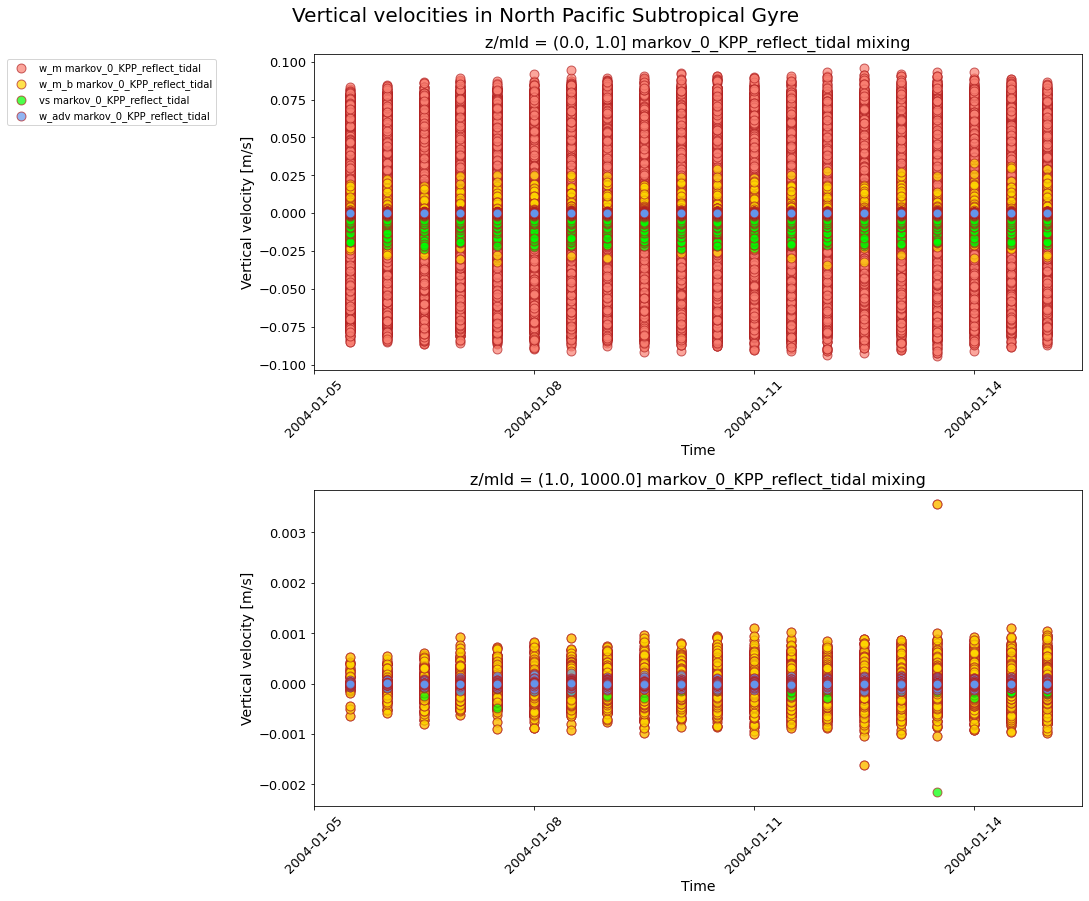

In [24]:
fig = plt.figure(figsize=(15,12),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
axes = [ax1, ax2]

split_ds = list(ds.groupby_bins('mld',[0,1,1000]))
for c, ds_g in enumerate(split_ds):
    axes[c].scatter(ds_g[1]['time'].astype('O'), ds_g[1]['w_m'], c=w_vel_cmap[0], s=80, edgecolor=mixing_cmap[0], alpha=0.7, label = 'w_m '+mixing)
    axes[c].scatter(ds_g[1]['time'].astype('O'), ds_g[1]['w_m_b'], c=w_vel_cmap[3], s=80, edgecolor=mixing_cmap[0], alpha=0.7, label = 'w_m_b '+mixing)
    axes[c].scatter(ds_g[1]['time'].astype('O'), ds_g[1]['vs'], c=w_vel_cmap[1], s=80, edgecolor=mixing_cmap[0], alpha=0.7, label = 'vs '+mixing)
    axes[c].scatter(ds_g[1]['time'].astype('O'), ds_g[1]['w_adv'], c=w_vel_cmap[2], s=80, edgecolor=mixing_cmap[0], alpha=0.7, label = 'w_adv '+mixing)
    

    axes[c].set_xlabel('Time', fontsize=14)
    axes[c].set_xticks(times[::6].values)
    axes[c].set_xticklabels(timelabels[::6].values)
    axes[c].tick_params(axis='both', labelsize=13)
    axes[c].tick_params(axis='x', rotation=45)
#         ax.set_ylim(-0.00001,0.00001)
    axes[c].set_ylabel('Vertical velocity [m/s]', fontsize=14)
    axes[c].set_title('z/mld = '+ str(split_ds[c][0])+' '+mixing+' mixing', fontsize=16)
axes[0].legend(bbox_to_anchor=(-0.12, 1), loc='upper right')

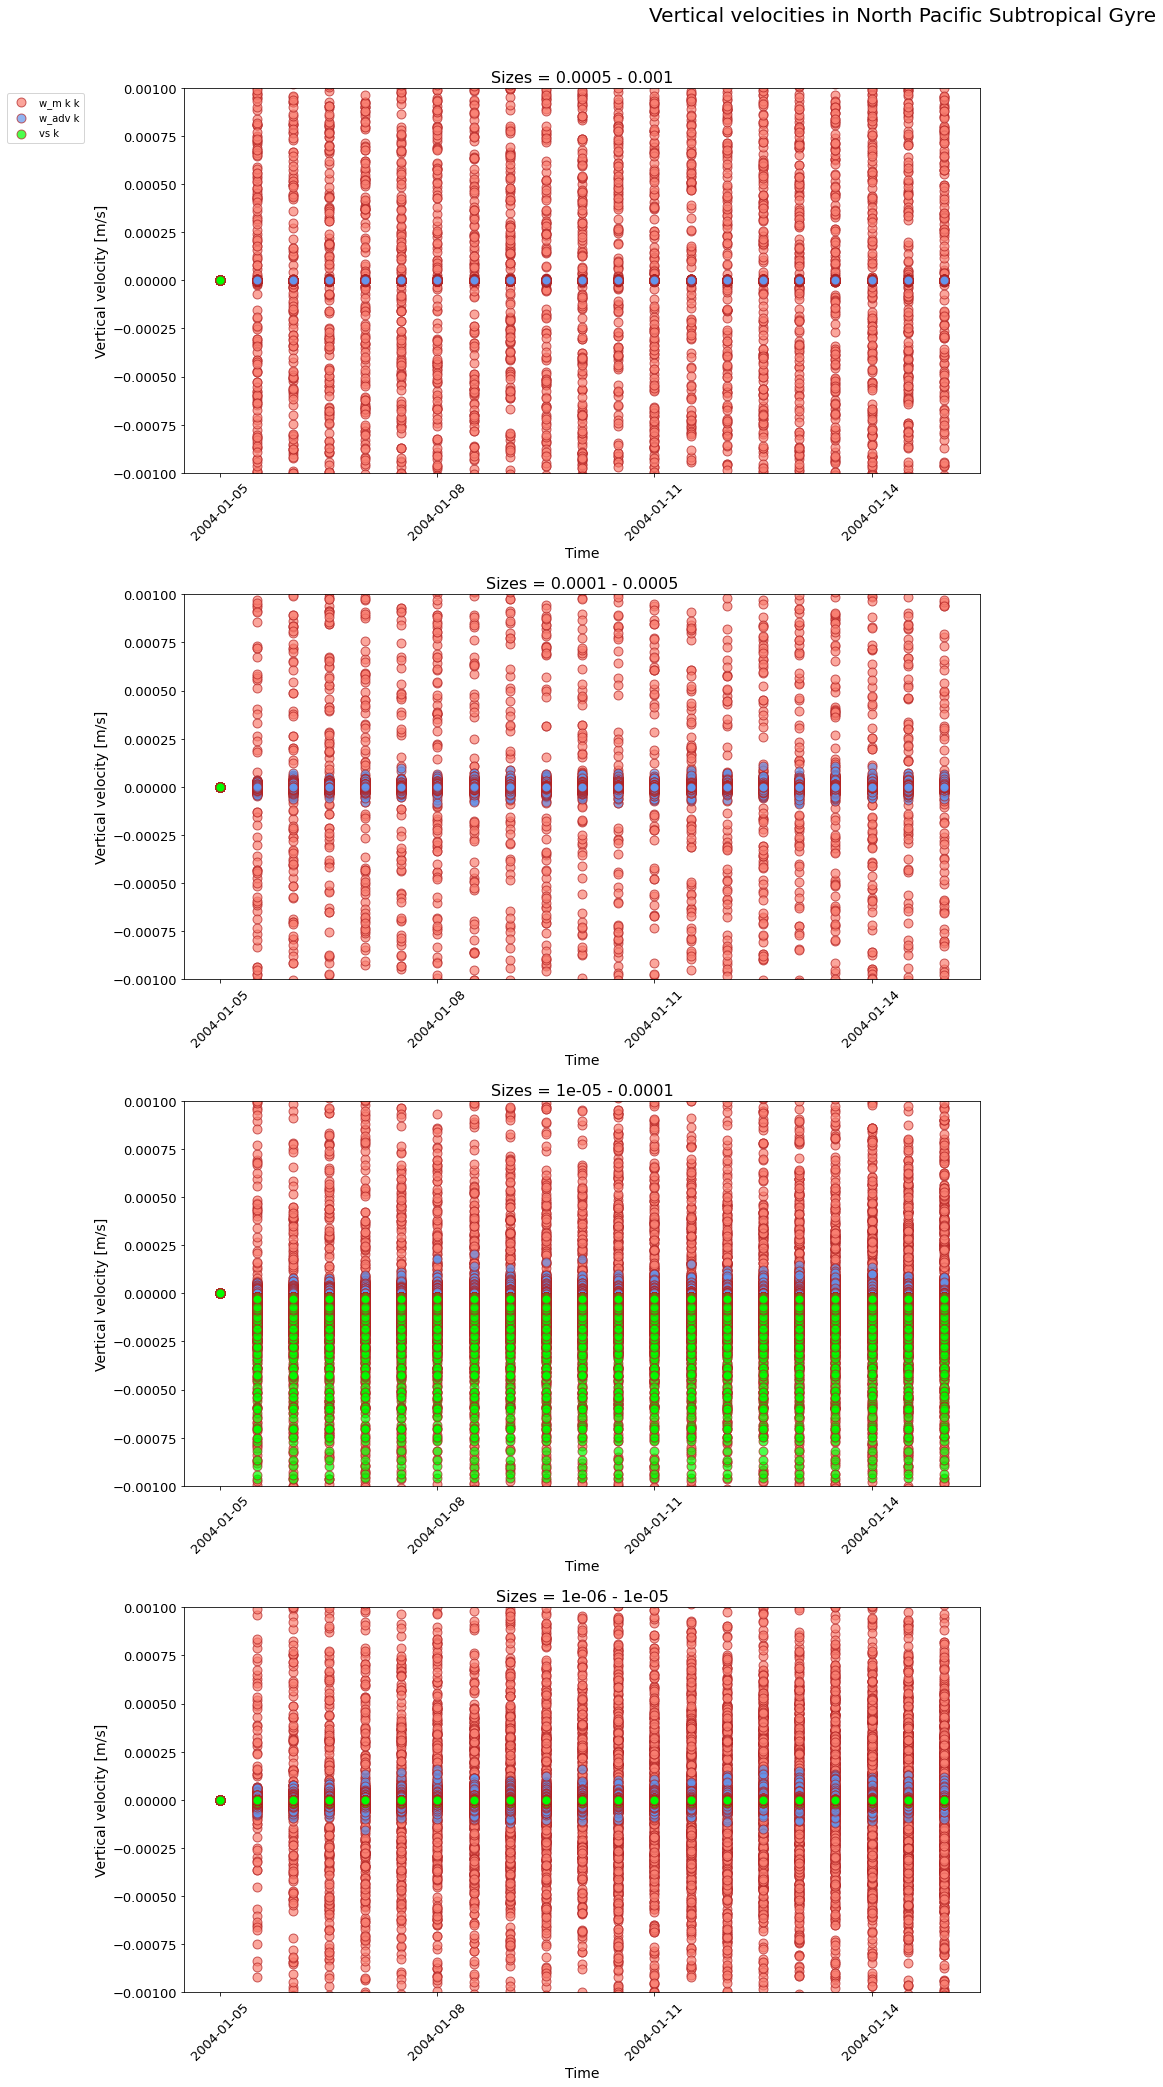

In [32]:
fig = plt.figure(figsize=(25,28),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])
axes = [ax1, ax2, ax3, ax4]
locs = ['upper right','upper left']
anchors = [-0.12, 1.05]

split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
for c, ds_g in enumerate(split_ds):
    axes[c].scatter(ds_g[1]['time'].astype('O'), ds_g[1]['w_m'], c=w_vel_cmap[0], s=80, edgecolor=mixing_cmap[0], alpha=0.7, label = 'w_m '+mixing[i]+' '+mixing[i])
    axes[c].scatter(ds_g[1]['time'].astype('O'), ds_g[1]['w_adv'], c=w_vel_cmap[2], s=80, edgecolor=mixing_cmap[0], alpha=0.7, label = 'w_adv '+mixing[i])
    axes[c].scatter(ds_g[1]['time'].astype('O'), ds_g[1]['vs_init'], c=w_vel_cmap[1], s=80, edgecolor=mixing_cmap[0], alpha=0.7, label = 'vs '+mixing[i])
    
    axes[c].set_xlabel('Time', fontsize=14)
    axes[c].set_xticks(times[::6].values)
    axes[c].set_xticklabels(timelabels[::6].values)
    axes[c].tick_params(axis='both', labelsize=13)
    axes[c].tick_params(axis='x', rotation=45)
    axes[c].set_ylim(-0.001,0.001)
    axes[c].set_ylabel('Vertical velocity [m/s]', fontsize=14)
    axes[c].set_title('Sizes = '+ str(split_ds[c][0].left)+' - '+str(split_ds[c][0].right), fontsize=16)
axes[0].legend(bbox_to_anchor=(-0.12, 1), loc='upper right')

Text(0.5, 0, 'Wind diffusivity')

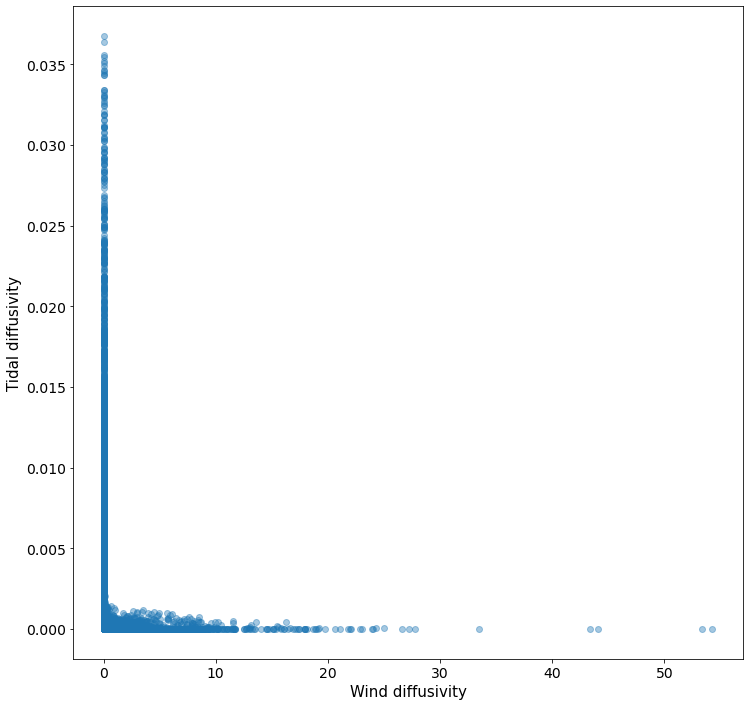

In [15]:
fig =plt.figure(figsize=(12,12))
ax = plt.axes()

ax.scatter(ds['KPP'],ds['K_z_t'], alpha=0.4)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Tidal diffusivity', fontsize=15)
ax.set_xlabel('Wind diffusivity', fontsize=15)